In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
import os
from adjustText import adjust_text
import warnings
import datetime as dt
import locale
warnings.simplefilter(action='ignore', category=FutureWarning)

## <font color=indianred> Données sources </font>

#### Base clients

In [2]:
clients = pd.read_excel("Data/Clientes.xlsx")
clients["Fecha de alta"] = pd.to_datetime(clients["Fecha de alta"], format="%d/%m/%Y")
clients["Ultima reserva"] = pd.to_datetime(clients["Última reserva"], format="%d/%m/%Y")
clients["CLTV"] = pd.to_numeric(clients["CLTV"].str.replace("$","").str.replace(",",""))
clients.drop(columns=["Última reserva","Email", "Teléfono", "Cédula", "Dirección", "Código postal", "Ciudad",
                     "Provincia", "País", "IBAN", "Notas", "Fecha de alta", "MRR"],inplace=True)

df_clients = clients.sort_values("CLTV", ascending=False)
df_clients.head()

,Nombre,Fecha de nacimiento,Género,Estado,Actualización de estado,CLTV,Ultima reserva
5,Vanessa Guaman,11/04/1990,Femenino,Activo,2024-04-03,1384.0,2024-04-29
2,Melanie Arraiz,14/11/2021,Femenino,Activo,2024-04-08,1115.0,2024-04-25
3,Verónica Zapata,20/01/1986,Femenino,Activo,2024-03-11,1034.0,2024-05-02
4,Martha Alejandro,NaN,Femenino,Activo,2024-03-18,1013.0,2024-04-25
7,Ana Milena,NaN,Femenino,Activo,2024-03-03,950.0,2024-04-25


#### Base actifs

In [3]:
path = os.getcwd()
path_actifs = path + "/Data/Actifs"
files = os.listdir(path_actifs)

df_actifs = pd.DataFrame()

for file in files :
    if "xls" in os.path.splitext(file)[1]:
        actif = pd.read_excel(path_actifs + "/" + file)
        df_actifs = pd.concat([df_actifs, actif])
        
df_actifs.drop(columns=["Email", "ID"], inplace=True)
df_actifs["Fecha de inicio"] = pd.to_datetime(df_actifs["Fecha de inicio"], format="%d/%m/%Y")
df_actifs["Fecha de caducidad"] = pd.to_datetime(df_actifs["Fecha de caducidad"], format="%d/%m/%Y")
df_actifs["Fecha"] = pd.to_datetime(df_actifs["Fecha"], format="%d/%m/%Y")
df_actifs["Hora de inicio"] = pd.to_datetime(df_actifs["Hora de inicio"], format="%H:%S")
df_actifs["Hora de finalización"] = pd.to_datetime(df_actifs["Hora de finalización"], format="%H:%S")
#df_actifs["Duration"] = (df_actifs["Hora de finalización"] - df_actifs["Hora de inicio"]).dt.components.hours
df_actifs["Hora de inicio"] = df_actifs["Hora de inicio"].dt.time
df_actifs["Hora de finalización"] = df_actifs["Hora de finalización"].dt.time
df_actifs["Consume créditos"] = np.where(df_actifs["Consume créditos"]=="Sí", "Yes", "No")
df_actifs.head()

,Cliente,Cuota,Fecha de inicio,Fecha de caducidad,Estado,Programa,Fecha,Hora de inicio,Hora de finalización,Consume créditos
0,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Flexi relax,2024-04-24,18:00:00,19:00:00,Yes
1,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Sport,2024-04-18,18:00:00,19:00:00,Yes
2,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Spining,2024-04-16,18:00:00,19:00:00,Yes
0,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Floor Work,2024-04-27,10:00:00,11:00:00,Yes
1,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Pole Sport,2024-04-25,19:00:00,20:00:00,Yes


#### Base factures

In [4]:
path = os.getcwd()
path_factures = path + "/Data/Factures"
annees = os.listdir(path_factures)[:-1]

df_factures = pd.DataFrame()

for annee in annees:
    files = os.listdir(path_factures + "/" + annee)
    for file in files :
        if "xls" in os.path.splitext(file)[1]:
            factures = pd.read_excel(path_factures + "/" + annee + "/" + file)
            df_factures = pd.concat([df_factures, factures])

df_factures = df_factures[df_factures["Estado"]!="Cancelado"]
df_factures.drop(columns=["Email", "Cédula", "Impuestos", "Notas", "Número", "Estado"], inplace=True)
df_factures["Fecha"] = pd.to_datetime(df_factures["Fecha"], format="%d/%m/%Y")
df_factures = df_factures.sort_values("Fecha", ascending=False)
df_factures["Date"] = df_factures["Fecha"].dt.strftime('%Y-%m')
df_factures.head()

,Fecha,Cliente,Cuota,Medio de Pago,Subtotal,Descuentos,Total,Date
0,2024-04-30,Ana Paula Iñiguez,8 clases al mes,Efectivo,45.0,0,45.0,2024-04
1,2024-04-28,Ana Milena,16 clases al mes,Efectivo,74.0,0,74.0,2024-04
2,2024-04-28,Vanessa Guaman,16 clases al mes,Efectivo,75.0,0,75.0,2024-04
4,2024-04-27,Susana Pañi,8 clases al mes,Efectivo,45.0,0,45.0,2024-04
5,2024-04-25,Amelia Quimis,Pack ilimitado.,Efectivo,100.0,0,100.0,2024-04


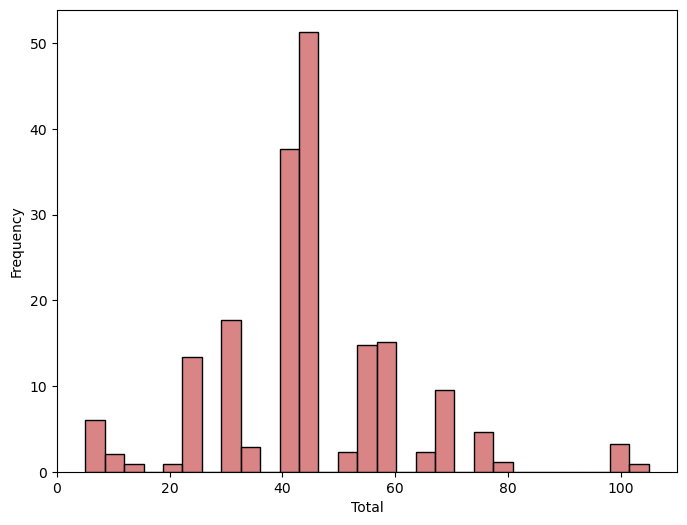

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(axes=ax, data=df_factures,x="Total", stat="frequency", color="indianred");

#### Incomes

In [6]:
ca = df_factures[["Date", "Total"]].groupby("Date").sum().reset_index()
# Conversion des dates au format numérique de Matplotlib
ca['DateNum'] = mdates.date2num(ca['Date'])
ca = ca[ca["Date"]>= "2023-01"]
ca["Total"] = ca["Total"].astype(int)

ca_2023 = ca[(ca.Date.str[:4]=="2023") & (ca.Date.str[5:7]!="12") & (ca.Date.str[5:7]!="02")]
ca_2024 = ca[(ca.Date.str[:4]=="2024") & (ca.Date.str[5:7]!="02")]


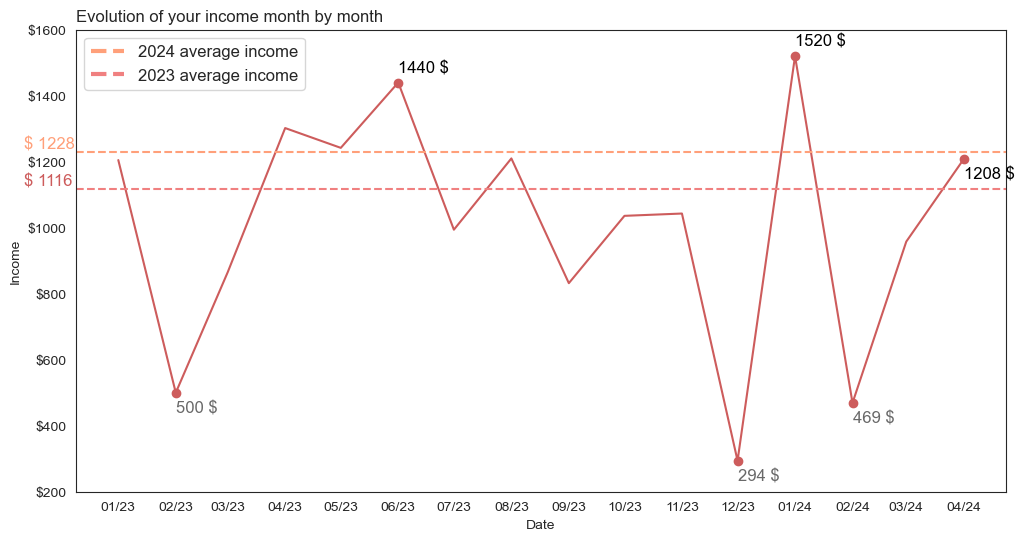

In [7]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,6))
decal = 30
moy = int(ca.Total.mean())
mean_2023 = int(ca_2023.Total.mean())
mean_2024 = int(ca_2024.Total.mean())

ax = sns.lineplot(ca, x="DateNum", y="Total", color="indianred")
ax.scatter(19389,ca[ca["DateNum"]==19389]["Total"], marker="o", color="indianred")
ax.scatter(19509,ca[ca["DateNum"]==19509]["Total"], marker="o", color="indianred")
ax.scatter(19692,ca[ca["DateNum"]==19692]["Total"], marker="o", color="indianred")
ax.scatter(19723,ca[ca["DateNum"]==19723]["Total"], marker="o", color="indianred")
ax.scatter(19754,ca[ca["DateNum"]==19754]["Total"], marker="o", color="indianred")
ax.scatter(19814,ca[ca["DateNum"]==19814]["Total"], marker="o", color="indianred")

lab = ["$" + str(int(k)) for k in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(),lab)
ax.set_ylabel("Income")
ax.set_xlabel("Date")


ax.axhline(mean_2023, color="lightcoral", linestyle="--")
ax.axhline(mean_2024, color="lightsalmon", linestyle="--")

ax.text(19509, ca[ca["DateNum"]==19509]["Total"] + decal, str(ca[ca["DateNum"]==19509]["Total"].iloc[0])+" $",  color='black', fontsize=12)
ax.text(19723, ca[ca["DateNum"]==19723]["Total"] + decal, str(ca[ca["DateNum"]==19723]["Total"].iloc[0])+" $",  color='black', fontsize=12)
ax.text(19389, ca[ca["DateNum"]==19389]["Total"] - (decal + 30), str(ca[ca["DateNum"]==19389]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text(19692, ca[ca["DateNum"]==19692]["Total"] - (decal + 30), str(ca[ca["DateNum"]==19692]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text(19754, ca[ca["DateNum"]==19754]["Total"] - (decal + 30), str(ca[ca["DateNum"]==19754]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text(19814, ca[ca["DateNum"]==19814]["Total"] - (decal + 30), str(ca[ca["DateNum"]==19814]["Total"].iloc[0])+" $",  color='black', fontsize=12)
ax.text(19307, mean_2023 + 10, "$ " + str(mean_2023),  color='indianred', fontsize=12)
ax.text(19307, mean_2024 + 10, "$ " + str(mean_2024),  color='lightsalmon', fontsize=12)

ax.set_title("Evolution of your income month by month", loc="left")
ax.set_xticks(ca.DateNum,["01/23", "02/23","03/23", "04/23", "05/23", "06/23", "07/23", "08/23", "09/23", "10/23", "11/23", "12/23", "01/24", "02/24", "03/24", "04/24"]);

custom_lines = [Line2D([0], [0], color="lightsalmon", lw=3, linestyle="--"),
                Line2D([0], [0], color="lightcoral", lw=3,linestyle="--")]

ax.legend(custom_lines, ['2024 average income', '2023 average income'], fontsize=12)

plt.savefig('graph/income_V1.jpeg');


In [8]:
current_locale = locale.getlocale()

locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

ca_2023_full = ca[ca['Date'].str[:4] == "2023"].copy()
ca_2024_full = ca[ca['Date'].str[:4] == "2024"].copy()

ca_2023_full.loc[:, 'Mois'] = ca_2023_full['Date'].str[5:7]
ca_2024_full.loc[:, 'Mois'] = ca_2024_full['Date'].str[5:7]

ca_2024_full["Mois"] = ca_2024_full["Mois"].apply(lambda x : dt.datetime.strptime(x, '%m')).dt.strftime('%b')
ca_2023_full["Mois"] = ca_2023_full["Mois"].apply(lambda x : dt.datetime.strptime(x, '%m')).dt.strftime('%b')

#locale.setlocale(locale.LC_TIME, current_locale)


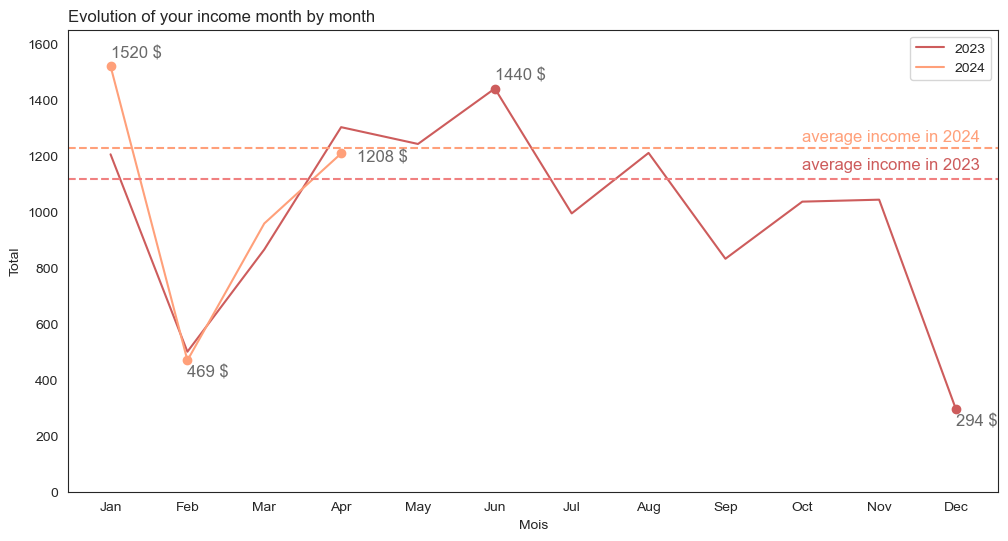

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(ca_2023_full, x="Mois", y="Total", color="indianred", label="2023")
ax = sns.lineplot(ca_2024_full, x="Mois", y="Total", color="lightsalmon", label="2024")

ax.axhline(mean_2023, color="lightcoral", linestyle="--")
ax.axhline(mean_2024, color="lightsalmon", linestyle="--")

ax.text(9,1250,"average income in 2024", color="lightsalmon", size=12)
ax.text(9,1150,"average income in 2023", color="indianred", size=12)

ax.set_title("Evolution of your income month by month", loc="left")

ax.text("Feb", ca_2024_full[ca_2024_full["Mois"]=="Feb"]["Total"] - (decal+30), str(ca_2024_full[ca_2024_full["Mois"]=="Feb"]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text("Jan", ca_2024_full[ca_2024_full["Mois"]=="Jan"]["Total"] + decal, str(ca_2024_full[ca_2024_full["Mois"]=="Jan"]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text("Jun", ca_2023_full[ca_2023_full["Mois"]=="Jun"]["Total"] + decal, str(ca_2023_full[ca_2023_full["Mois"]=="Jun"]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text(3.2, ca_2024_full[ca_2024_full["Mois"]=="Apr"]["Total"] - decal, str(ca_2024_full[ca_2024_full["Mois"]=="Apr"]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)
ax.text("Dec", ca_2023_full[ca_2023_full["Mois"]=="Dec"]["Total"] - (decal+30), str(ca_2023_full[ca_2023_full["Mois"]=="Dec"]["Total"].iloc[0])+" $",  color='dimgrey', fontsize=12)

ax.scatter("Feb",ca_2024_full[ca_2024_full["Mois"]=="Feb"]["Total"], marker="o", color="lightsalmon")
ax.scatter("Jan",ca_2024_full[ca_2024_full["Mois"]=="Jan"]["Total"], marker="o", color="lightsalmon")
ax.scatter("Jun",ca_2023_full[ca_2023_full["Mois"]=="Jun"]["Total"], marker="o", color="indianred")
ax.scatter("Apr",ca_2024_full[ca_2024_full["Mois"]=="Apr"]["Total"], marker="o", color="lightsalmon")
ax.scatter("Dec",ca_2023_full[ca_2023_full["Mois"]=="Dec"]["Total"], marker="o", color="indianred")

ax.set_ylim(0,1650)

plt.savefig('graph/income_V2.jpeg');

#### Cuota

In [10]:
cota = df_factures.copy()
cota["Year"] = cota["Date"].str[:4]
cota.groupby(["Year", "Cuota", "Total"]).mean("Total").reset_index()

,Year,Cuota,Total,Subtotal,Descuentos
0,2022,12 clases al mes,44.0,44.0,11.0
1,2022,12 clases al mes,50.0,50.0,0.0
2,2022,12 clases al mes,55.0,55.0,0.0
3,2022,16 clases al mes,65.0,65.0,0.0
4,2022,16 clases al mes,70.0,70.0,0.0
...,...,...,...,...,...
63,2024,8 clases al mes,50.0,50.0,0.0
64,2024,8 clases al mes,52.0,52.0,0.0
65,2024,8 clases al mes,55.0,55.0,0.0
66,2024,Flexi Pack,10.0,10.0,0.0


In [11]:
cota_mean = cota.pivot_table(index="Cuota", values="Total",columns="Year", aggfunc=np.mean)
cota_sum = cota.pivot_table(index="Cuota", values="Total",columns="Year", aggfunc=np.sum)

In [12]:
cota_relatif = cota.copy()
cota_relatif["Cuota"] = np.where(cota_relatif["Cuota"].str[:5]=="Promo", "Promos", cota_relatif["Cuota"])
cota_relatif = cota_relatif.pivot_table(index="Cuota", values="Total",columns="Year", aggfunc="count").reset_index()
cota_relatif["2024"] = cota_relatif["2024"]/cota_relatif["2024"].sum()*100
cota_relatif["2023"] = cota_relatif["2023"]/cota_relatif["2023"].sum()*100
cota_relatif = cota_relatif.drop(columns="2022")
cota_relatif.dropna(subset=['2023', '2024'], how='all', axis=0, inplace=True)


In [13]:
cota_relatif.sort_values("2024", ascending=False, inplace=True)

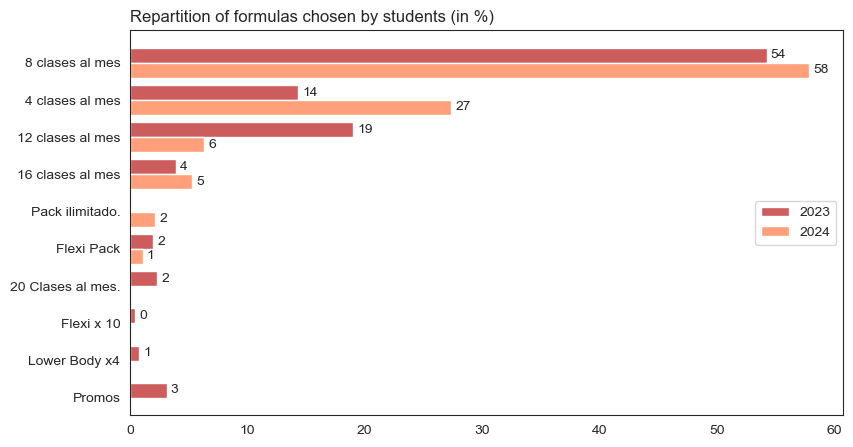

In [14]:

x = np.arange(len(cota_relatif.Cuota)) 
width = 0.20
height = 0.4

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()

rects1 = ax.barh(x-width, width=cota_relatif["2023"], color="indianred", height=height, label="2023")
rects2 = ax.barh(x+width, width=cota_relatif["2024"], color="lightsalmon", height=height, label="2024")

ax.set_yticks(x, cota_relatif.Cuota)

#Etiquette des données
ax.bar_label(rects1, padding=3, fmt='%1.0f')
ax.bar_label(rects2, padding=3, fmt='%1.0f')

ax.set_title("Repartition of formulas chosen by students (in %)", loc="left")

ax.legend(loc="best")

plt.savefig('graph/formulas_chosen.jpeg');

In [15]:
cond = (cota.Year=="2024") & (cota.Cuota=="8 clases al mes")
cota[cond]["Total"].mean()

44.663636363636364

In [16]:
tarifs_8_classes = {"Auris" : 50,
                    "Samsara" : 50,
                    "Studiofit_quito": 50,
                    "Studio_593_guayaquil" : 50}

In [17]:
# Forcer prix à 50$ pour les 8 clases al mes
cota_2014 = cota[cota.Year=="2024"].copy()
cond = (cota_2014.Cuota=="8 clases al mes")
cota_2014.loc[:,"Total_simu"] = np.where(cond, 50, cota_2014.Total)

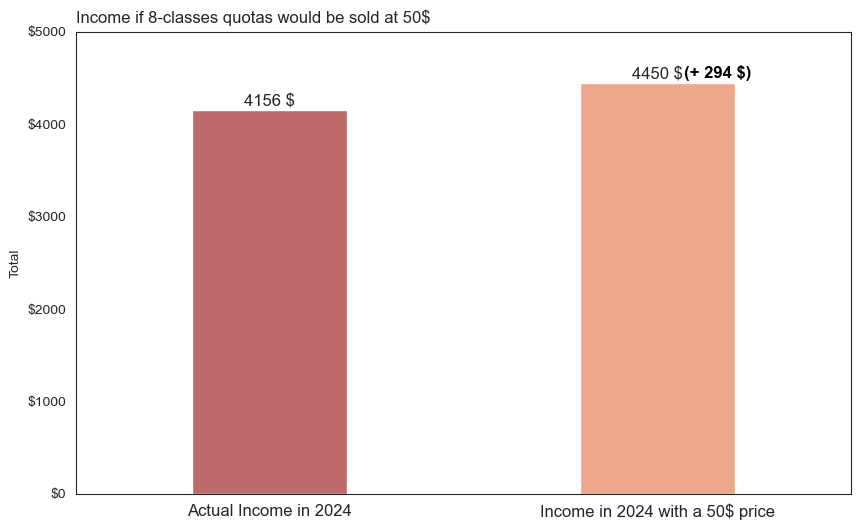

In [18]:
df_bar = pd.DataFrame({"Total" : [cota_2014.Total.sum(), cota_2014.Total_simu.sum()], "Année" : ["Actual Income in 2024", "Income in 2024 with a 50$ price"]})


fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(df_bar, x ="Année", y = "Total", width=0.4, palette=["indianred", "lightsalmon"])

lab = ["$" + str(int(k)) for k in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(),lab)

for i in ax.containers:
    ax.bar_label(i,fmt='%1.0f $', size=12)

ax.text(1.07, 4500, "(+ 294 $)", fontweight="bold", color="black", fontsize=12)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12) 

ax.set_title("Income if 8-classes quotas would be sold at 50$", loc="left", size=12)

plt.savefig('graph/8_classes_focus.jpeg');


In [19]:
cota_student = cota[["Cliente", "Total"]].groupby("Cliente").sum().reset_index().rename(columns={"Total" : "Money_spent"})

#### Classes

In [20]:
classes = df_actifs.copy()
#classes["Year"] = classes["Fecha"].dt.year
#classes = classes[classes["Year"]==2024]
classes = classes[classes["Consume créditos"]=="Yes"]
classes.drop(columns=["Consume créditos"])
classes.head()

,Cliente,Cuota,Fecha de inicio,Fecha de caducidad,Estado,Programa,Fecha,Hora de inicio,Hora de finalización,Consume créditos
0,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Flexi relax,2024-04-24,18:00:00,19:00:00,Yes
1,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Sport,2024-04-18,18:00:00,19:00:00,Yes
2,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Spining,2024-04-16,18:00:00,19:00:00,Yes
0,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Floor Work,2024-04-27,10:00:00,11:00:00,Yes
1,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Pole Sport,2024-04-25,19:00:00,20:00:00,Yes


In [21]:
classes_student = classes[["Cliente", "Fecha"]].groupby("Cliente").count().reset_index()
classes_student.rename(columns={"Fecha" : "Classes"}, inplace=True)
classes_student = classes_student.merge(cota_student, how="left", on="Cliente")

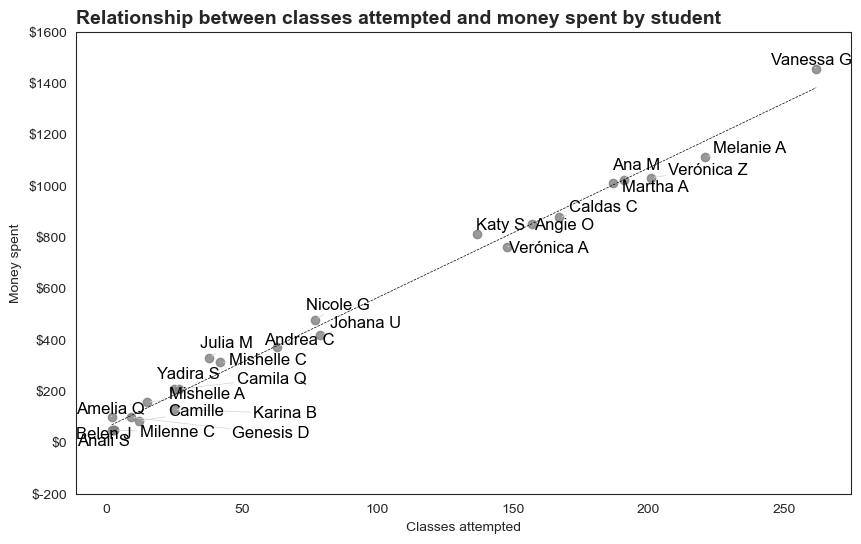

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.regplot(classes_student, x="Classes", y="Money_spent", ci=None,
                 line_kws=dict(color="black",linewidth=0.5, linestyle='--'), color="grey")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

names = classes_student["Cliente"]

def extract_name(name):
    if len(name.split())>1:
        name_extr = name.split()[0].capitalize() + " " + name.split()[1].capitalize()[0]
    else:
        name_extr = name.split()[0].capitalize()

    return name_extr

names = names.apply(extract_name)

slope, intercept = np.polyfit(classes_student['Classes'], classes_student['Money_spent'], 1)

texts = []
for x,y,z in zip(classes_student["Classes"], classes_student["Money_spent"], names):
    if y > (intercept + slope * x) + 250:
        texts.append(ax.text(x,y,z,color="lightsalmon", size=12))
    elif y < (intercept  + slope * x) - 250:
        texts.append(ax.text(x,y,z,color="indianred", size=12))
    else:
        texts.append(ax.text(x,y,z,color="black", size=12))
        
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='lightgrey', lw=0.5));

ax.set_title("Relationship between classes attempted and money spent by student", loc="left", fontweight="semibold", size=14)

lab = ["$" + str(int(k)) for k in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(),lab)

ax.set_ylabel("Money spent")
ax.set_xlabel("Classes attempted");

custom_lines = [Line2D([0], [0], color="lightsalmon", lw=3),
                Line2D([0], [0], color="indianred", lw=3)]

#ax.legend(custom_lines, ['Should pay less', 'Should pay more'], fontsize=12)

plt.savefig('graph/money_classes.jpeg');

Veronica has suscribe to unlimited packs <br>
Johana seems to had benefits too much about no consume credits

In [23]:
student = "Johana U"
classes = df_actifs.copy()

classes_johana = classes[classes["Cliente"].str.contains(student)]
classes_no_johana = classes[~classes["Cliente"].str.contains(student)]


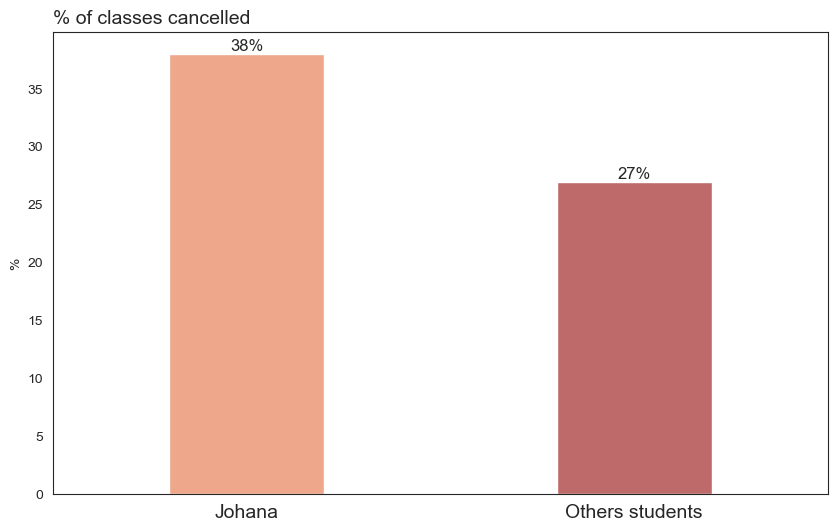

In [24]:
pct_no_johana = round(classes_johana[classes_johana["Consume créditos"]=="No"].count()[0]
                      / classes_johana["Consume créditos"].count(),2) * 100
pct_no_all = round(classes_no_johana[classes_no_johana["Consume créditos"]=="No"].count()[0]
                      / classes_no_johana["Consume créditos"].count(),2) * 100

df = pd.DataFrame({"Pct": [pct_no_johana, pct_no_all]}, index=["Johana", "Others students"])

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(df, x=df.index, y="Pct", width=0.4, palette=["lightsalmon", "indianred"])


ax.set_ylabel("%")
for i in ax.containers:
    ax.bar_label(i,fmt='%1.0f%%', size=12)

ax.set_xticklabels(ax.get_xticklabels(), size=14)
ax.set_title("% of classes cancelled", loc="left", size=14)

plt.savefig('graph/johana_focus.jpeg');

In [25]:
(classes.sort_values(["Cliente","Fecha"], ascending=False)
.drop_duplicates("Cliente")
.sort_values("Fecha")
.reset_index(drop=True)).iloc[:5]

,Cliente,Cuota,Fecha de inicio,Fecha de caducidad,Estado,Programa,Fecha,Hora de inicio,Hora de finalización,Consume créditos
0,Katy Sacta,8 clases al mes,2024-04-02,2024-05-02,Activo,Exotic,2024-04-18,17:00:30,18:00:30,No
1,Camille,8 clases al mes,2024-03-26,2024-04-26,Activo,Pole Sport,2024-04-19,17:00:30,18:00:30,Yes
2,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Flexi relax,2024-04-24,18:00:00,19:00:00,Yes
3,Yadira Santamaria Rubio,4 clases al mes,2024-04-01,2024-05-01,Activo,Floor Work,2024-04-25,18:00:00,19:00:00,No
4,Julia Madsen,4 clases al mes,2024-04-18,2024-05-18,Activo,Pole Sport,2024-04-25,17:00:30,18:00:30,Yes


#### Programa

In [26]:
classes = df_actifs.copy()
classes["Year"] = classes["Fecha"].dt.year
classes["Date"] = classes["Fecha"].dt.strftime('%y-%m')
classes = classes[(classes["Date"]>="23-09") & (classes["Consume créditos"]=="Yes")]
classes.head()

,Cliente,Cuota,Fecha de inicio,Fecha de caducidad,Estado,Programa,Fecha,Hora de inicio,Hora de finalización,Consume créditos,Year,Date
0,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Flexi relax,2024-04-24,18:00:00,19:00:00,Yes,2024,24-04
1,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Sport,2024-04-18,18:00:00,19:00:00,Yes,2024,24-04
2,Milenne Cabrera,8 clases al mes,2024-04-16,2024-05-16,Activo,Pole Spining,2024-04-16,18:00:00,19:00:00,Yes,2024,24-04
0,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Floor Work,2024-04-27,10:00:00,11:00:00,Yes,2024,24-04
1,Anali Sanmartin,8 clases al mes,2024-04-06,2024-05-06,Activo,Pole Sport,2024-04-25,19:00:00,20:00:00,Yes,2024,24-04


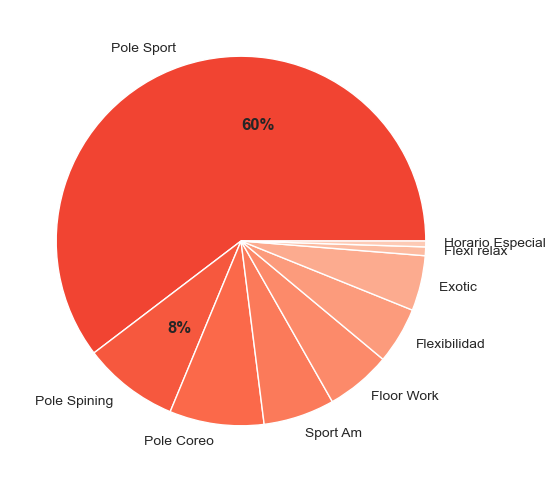

In [27]:
classes_pie = pd.DataFrame(classes["Programa"].value_counts()).reset_index()

fig, ax = plt.subplots(figsize=(12,6))
colors = plt.get_cmap('Reds')(np.linspace(0.6, 0.2, len(classes_pie)))
ax.pie(x=classes_pie["count"], labels=classes_pie.Programa, colors=colors);
ax.text(0,0.6,"60%", fontsize=12, fontweight="bold")
ax.text(-0.4,-0.5,"8%", fontsize=12, fontweight="bold")

plt.savefig('graph/programa.jpeg');

In [28]:
classes_all = (classes[["Date","Fecha"]]
                .groupby("Date")
                .count()
                .reset_index()
                .rename(columns={"Fecha":"Classes"})
               )

cours = "Floor Work "
classes_cours = classes[classes["Programa"].str.contains(cours)]
classes_cours = (classes_cours[["Date","Fecha"]]
                .groupby("Date")
                .count()
                .reset_index()
                .rename(columns={"Fecha":"Classes"})
               )


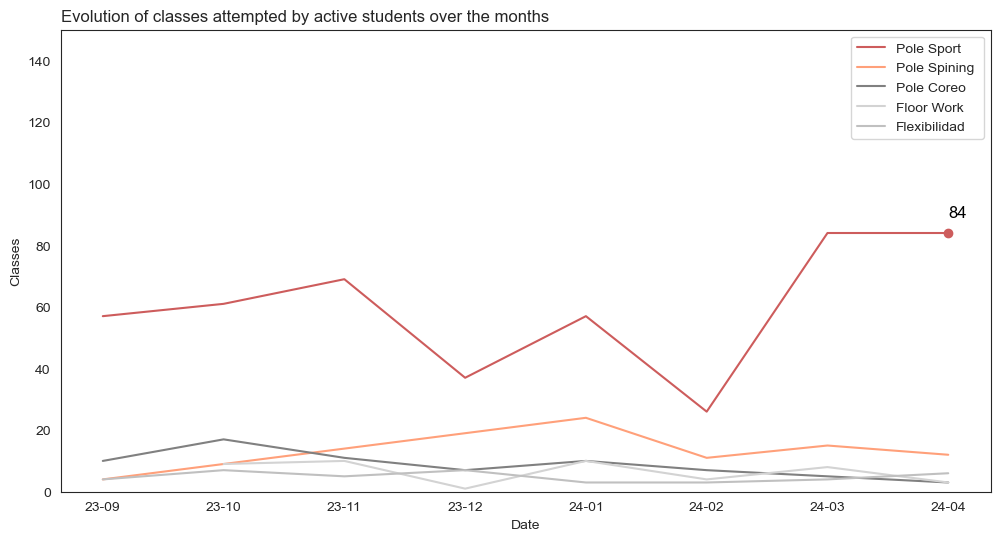

In [29]:
cours = list(classes["Programa"].value_counts().index)
cours.remove("Sport Am")

fig, ax = plt.subplots(figsize=(12,6))

cours = list(classes["Programa"].value_counts().index)
cours.remove("Sport Am")

list_colors = ["indianred", "lightsalmon", "grey", "lightgrey", "silver"]

for elt, col in zip(cours[:5], list_colors):

    classes_cours = classes[classes["Programa"].str.contains(elt)]
    classes_cours = (classes_cours[["Date","Fecha"]]
                    .groupby("Date")
                    .count()
                    .reset_index()
                    .rename(columns={"Fecha":"Classes"})
                   )
    ax = sns.lineplot(classes_cours, x="Date", y="Classes", label=elt, color=col)

ax.set_title("Evolution of classes attempted by active students over the months", loc="left")

classes_cours = classes[classes["Programa"].str.contains("Pole Sport")]
classes_cours = (classes_cours[["Date","Fecha"]]
                    .groupby("Date")
                    .count()
                    .reset_index()
                    .rename(columns={"Fecha":"Classes"})
                   )

ax.scatter("24-04", classes_cours[classes_cours["Date"]=="24-04"]["Classes"], marker="o", color="indianred")
ax.text("24-04", classes_cours[classes_cours["Date"]=="24-04"]["Classes"]+5, classes_cours[classes_cours["Date"]=="24-04"]["Classes"].iloc[0],  color='black', fontsize=12)

ax.set_ylim(0,150)
ax.set_ylim(0,150)

plt.savefig('graph/programa_classes.jpeg');

#### Inactive student

In [30]:
mask = ((df_clients["Estado"]=="Inactivo")
        & (df_clients["CLTV"]>=90)
        & (df_clients["Ultima reserva"].dt.year==2024)
       )
unactif = df_clients[mask]
unactif.sort_values("CLTV", ascending=False)

,Nombre,Fecha de nacimiento,Género,Estado,Actualización de estado,CLTV,Ultima reserva
44,María Isabel Sánchez,NaN,Femenino,Inactivo,2024-04-05,770.0,2024-03-21
38,Ana Isabel Carrasco,NaN,Femenino,Inactivo,2024-04-05,760.0,2024-03-19
41,Susana Pañi,05/01/1993,Femenino,Inactivo,2024-04-26,614.0,2024-04-25
48,Domenica Cervantes,10/10/2002,Femenino,Inactivo,2024-04-19,334.0,2024-04-18
83,Marilyn Alexandra Pullaguari Ochoa,NaN,NaN,Inactivo,2024-02-06,270.0,2024-02-05
36,Víctoria Granda,NaN,Femenino,Inactivo,2024-03-23,165.0,2024-03-20
93,Sheifer acosta,29/08/1990,Femenino,Inactivo,2024-04-11,141.0,2024-04-08
102,Axelle Chavallier,NaN,Femenino,Inactivo,2024-04-10,120.0,2024-04-04
78,Gabriela Sillva,NaN,Femenino,Inactivo,2024-03-30,120.0,2024-03-28
104,Daniela Alberca,25/06/1996,Femenino,Inactivo,2024-04-11,100.0,2024-04-10
